In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IDRIDetectionDataset import IDRiDDetectionDataset
from torchvision import transforms, utils
from torch.utils.data import Dataset, DataLoader

In [14]:
# Prepare data
root_dir_train = 'C. Localization/1. Original Images/a. Training Set/'
csv_od_train = 'C. Localization/2. Groundtruths/1. Optic Disc Center Location/a. IDRiD_OD_Center_Training Set_Markups.csv'
csv_fovea_train = 'C. Localization/2. Groundtruths/2. Fovea Center Location/IDRiD_Fovea_Center_Training Set_Markups.csv'


root_dir_test = 'C. Localization/1. Original Images/b. Testing Set/'
csv_od_test = 'C. Localization/2. Groundtruths/1. Optic Disc Center Location/b. IDRiD_OD_Center_Testing Set_Markups.csv'
csv_fovea_test = 'C. Localization/2. Groundtruths/2. Fovea Center Location/IDRiD_Fovea_Center_Testing Set_Markups.csv'

In [15]:
# transform (preprocessing)
scale = transforms.Resize((224, 224))
to_tensor = transforms.ToTensor()
composed = transforms.Compose([scale, to_tensor])
# train and test set
train_set = IDRiDDetectionDataset(csv_od_train, csv_fovea_train, root_dir_train, composed,set_type = "train")
test_set = IDRiDDetectionDataset(csv_od_test, csv_fovea_test, root_dir_test, composed,set_type = "test")

#dataloaders
train_loader = DataLoader(train_set, batch_size=4,
                            shuffle=True, num_workers=0)
test_loader = DataLoader(test_set, batch_size=4,
                            shuffle=True, num_workers=0)

In [16]:
def show_image(image, OD, Fovea, ax, box = False):
    """Show image with OD and Fovea"""
    ax.imshow(image.permute(1, 2, 0))

    ax.scatter(OD[0]-0.4, OD[1], c ='#1f77b4', marker = 'o', label = 'OD')
    ax.scatter(Fovea[0], Fovea[1], c ='#2ca02c', marker = 'o', label = 'Fovea' )
    
    if box :
        size = 16
        od_x = [OD[0]-size, OD[0]-size, OD[0]+size, OD[0]+size,OD[0]-size]
        od_y = [OD[1]-size, OD[1]+size, OD[1]+size, OD[1]-size,OD[1]-size]
        fov_x = [Fovea[0]-size, Fovea[0]-size, Fovea[0]+size, Fovea[0]+size,Fovea[0]-size]
        fov_y = [Fovea[1]-size, Fovea[1]+size, Fovea[1]+size, Fovea[1]-size,Fovea[1]-size]
        ax.plot(od_x, od_y,c ='#1f77b4',linewidth=2)
        ax.plot(fov_x, fov_y,c ='#2ca02c',linewidth=2)

    ax.legend()
    #plt.show()

In [17]:
def plot_random_batch(dataset):
    idx = np.random.randint(0, dataset.__len__() , 4) 
    ax = []
    f = plt.figure(figsize=(14,14))
    for n,i in enumerate(idx,0):
        sample = dataset[i]
        ax.append(f.add_subplot(1,4,n+1))
        plt.title('Sample ' + str(i+1))
        show_image(**sample, ax=ax[n], box = True)

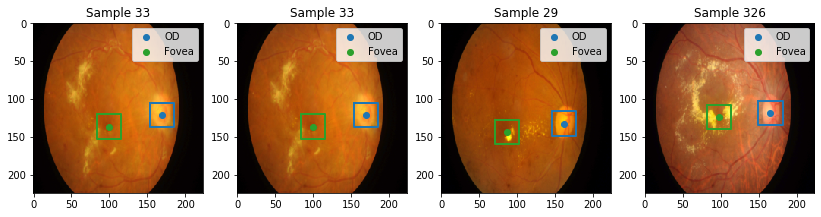

In [18]:
plot_random_batch(train_set)